<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据预处理" data-toc-modified-id="数据预处理-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据预处理</a></span></li><li><span><a href="#分类模型建立" data-toc-modified-id="分类模型建立-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>分类模型建立</a></span></li><li><span><a href="#超参数选择" data-toc-modified-id="超参数选择-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>超参数选择</a></span><ul class="toc-item"><li><span><a href="#选择k" data-toc-modified-id="选择k-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>选择k</a></span></li><li><span><a href="#选择权重" data-toc-modified-id="选择权重-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>选择权重</a></span></li><li><span><a href="#使用网格搜索grid-search" data-toc-modified-id="使用网格搜索grid-search-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>使用网格搜索grid search</a></span></li></ul></li></ul></div>

# 数据预处理

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

digits = datasets.load_digits() #手写数字数据集
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

(1797, 64) (1797,) [0 1 2 3 4 5 6 7 8 9]
[ 0.  0.  5. 15. 14.  3.  0.  0.  0.  0. 13. 15.  9. 15.  2.  0.  0.  4.
 16. 12.  0. 10.  6.  0.  0.  8. 16.  9.  0.  8. 10.  0.  0.  7. 15.  5.
  0. 12. 11.  0.  0.  7. 13.  0.  5. 16.  6.  0.  0.  0. 16. 12. 15. 13.
  1.  0.  0.  0.  6. 16. 12.  2.  0.  0.]


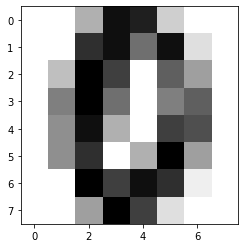

In [5]:
X = digits.data
y = digits.target
print(X.shape, y.shape, digits.target_names)

#获取一个具体数据，查看并可视化
some_digit = X[666]
print(some_digit)
some_digmit_image = some_digit.reshape(8,8)
plt.imshow(some_digmit_image, cmap = matplotlib.cm.binary)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 分类模型建立

In [7]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_predict = knn_clf.predict(X_test)
sum(y_predict == y_test)/len(y_test) #预测正确率

0.9933333333333333

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9933333333333333

In [9]:
knn_clf.score(X_test, y_test)

0.9933333333333333

# 超参数选择
## 选择k

In [10]:
#初始化最佳分数为0， 最佳值为k=-1
best_score = 0
best_k = -1
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score
print("best_k = ", best_k, "\nbest_score = ", best_score)

best_k =  3 
best_score =  0.9933333333333333


## 选择权重

In [11]:
best_score = 0
best_k = -1
for method in ["uniform", "distance"]:
    for k in range(1,11):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights=method, p=2)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_method = method
print("best_k = ", best_k, "\nbest_score = ", best_score,
     "\nbest_method = ", best_method)

best_k =  3 
best_score =  0.9933333333333333 
best_method =  uniform


## 使用网格搜索grid search

In [13]:
%%time
from sklearn.model_selection import GridSearchCV

param_search = [
    {
        "weights":["uniform"],
        "n_neighbors":[i for i in range(1,11)]
    },
    {
        "weights":["distance"],
        "n_neighbors":[i for i in range(1,11)],
        "p":[i for i in range(1,6)]
    }
]

grid_search = GridSearchCV(knn_clf, param_search)
grid_search.fit(X_train, y_train)

Wall time: 1min 2s


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=10, p=2,
                                            weights='distance'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [14]:
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_params_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
0.9873716095277434
{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


In [15]:
knn_clf = grid_search.best_estimator_
knn_clf.score(X_test, y_test)

0.9911111111111112